# Decomposition of total climate cange in 4xCO2 slab-ocean simultions of MPI-ESM-LR into non-cloud and cloud contribution by means fo the locking method

This notebook reproduces Figure 5.

Data: simulations with MPI-ESM-LR coupled to a slab ocean from Voigt et al., 2019, J. Climate, The Atmospheric Pathway of the Cloud-Radiative Impact on the Circulation Response to Global Warming: Important and Uncertain, doi: 10.1175/JCLI-D-18-0810.1. Time-mean and zonal-mean data for atmospheric temperature and zonal wind is used.

### Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Print library versions to screen for reference:

In [2]:
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

numpy:      1.18.1
matplotlib: 3.2.1


### Load data

**List of simulation nicknames**

For the locked simulations, 1 means values are prescribed from the free control simulation, and 2 means values are prescribed from the free 4xCO2 simulation. 
* ecav0011: data[0], free control
* ecav0012: data[1], free 4xCO2
* ecav0013: data[2], C1-C1-W1  (CO2 x clouds x water-vapor)
* ecav0014: data[3], C2-C2-W2
* ecav0015: data[4], C1-C2-W1
* ecav0016: data[5], C1-C1-W2
* ecav0017: data[6], C1-C2-W2
* ecav0018: data[7], C2-C1-W1
* ecav0019: data[8], C2-C2-W1
* ecav0020: data[9], C2-C1-W2

In [3]:
def load_data(var):
    from netCDF4 import Dataset
    data   = np.zeros((10, 26, 96))+np.nan
    path   = '../../data/climatechange/'
    file   = Dataset(path+'/ATM_ecav0011_1020_1059.zonmean.timmean.nc', 'r')
    data[0]= np.squeeze(np.array(file.variables[var]))
    file   = Dataset(path+'/ATM_ecav0012_1020_1044.zonmean.timmean.nc', 'r')
    data[1]= np.squeeze(np.array(file.variables[var]))    
    file   = Dataset(path+'/ATM_ecav0013_1060_1086.zonmean.timmean.nc', 'r')
    data[2]= np.squeeze(np.array(file.variables[var]))  
    file   = Dataset(path+'/ATM_ecav0014_1060_1086.zonmean.timmean.nc', 'r')
    data[3]= np.squeeze(np.array(file.variables[var]))  
    file   = Dataset(path+'/ATM_ecav0015_1060_1089.zonmean.timmean.nc', 'r')
    data[4]= np.squeeze(np.array(file.variables[var]))  
    file   = Dataset(path+'/ATM_ecav0016_1060_1089.zonmean.timmean.nc', 'r')
    data[5]= np.squeeze(np.array(file.variables[var]))  
    file   = Dataset(path+'/ATM_ecav0017_1060_1086.zonmean.timmean.nc', 'r')
    data[6]= np.squeeze(np.array(file.variables[var]))  
    file   = Dataset(path+'/ATM_ecav0018_1060_1086.zonmean.timmean.nc', 'r')
    data[7]= np.squeeze(np.array(file.variables[var])) 
    file   = Dataset(path+'/ATM_ecav0019_1060_1089.zonmean.timmean.nc', 'r')
    data[8]= np.squeeze(np.array(file.variables[var])) 
    file   = Dataset(path+'/ATM_ecav0020_1060_1089.zonmean.timmean.nc', 'r')
    data[9]= np.squeeze(np.array(file.variables[var])) 
    lev    = np.squeeze(np.array(file.variables['lev']))    
    lat    = np.squeeze(np.array(file.variables['lat']))
    return data, lev, lat


Load temperature and zonal wind:

In [4]:
t, lev, lat = load_data('t')
u, _  , _   = load_data('u')

Load tropopause of free control climate (calculated previously with ncl):

In [5]:
from netCDF4 import Dataset
file = Dataset('../../data/climatechange/ecav0011_tropopause_zonaltimemean.nc', 'r')
ptrop = np.squeeze(np.array(file.variables['ptrop']))
ptrop_lat = np.squeeze(np.array(file.variables['lat']))

# remove kinks from tropopause near 30 deg N/S
ptrop[30]=0.5*(ptrop[29]+ptrop[31])
ptrop[64]=0.5*(ptrop[63]+ptrop[65])

### Make decomposition into non-cloud and cloud contributions

In [6]:
def get_decomposition_climatechange(data):
    ddata = np.full([4, 26, 96], np.nan, dtype=float)    
    # free
    ddata[0] = data[1]-data[0]
    # lock
    ddata[1] = data[3]-data[2]
    # cloud    
    ddata[3] = 0.25*((data[4]-data[2])+(data[6]-data[5])+
                     (data[8]-data[7])+(data[3]-data[9]))
    # non-cloud
    ddata[2] = ddata[1]-ddata[3]
  
    return ddata

In [7]:
dt = get_decomposition_climatechange(t)
du = get_decomposition_climatechange(u)

### Plotting

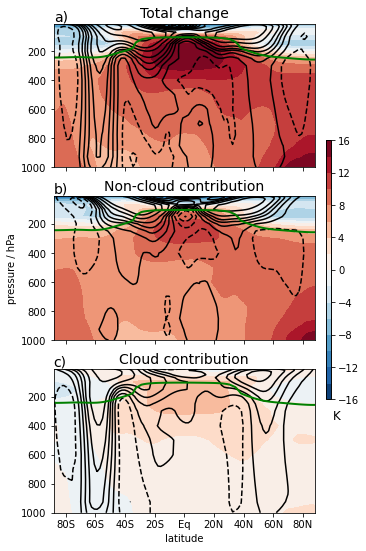

In [8]:
fig=plt.figure(figsize=(5,9))
clev_dt=16*np.linspace(-1,1,17)
clev_du=[-60,-55,-50,-45,-40,-35,-30,-25,-20,-15,-10,-7.5,-5,-3.5,-2.5,-1.5,-0.5,
         0.5,1.5,2.5,3.5,5,7.5,10,15,20,25,30,35,40,45,50,55,60]

ax=plt.subplot(3,1,1)
pdata=dt[0]; pdata[pdata>16]=16.0
plt.contourf(lat,lev/100,pdata,clev_dt,cmap='RdBu_r')#,extend='both')
cs=plt.contour(lat,lev/100,du[0],clev_du,colors='k')
plt.plot(ptrop_lat,ptrop/100,'g',linewidth=2)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], [''], fontsize=10)
plt.xlim(-88,88); plt.ylim(1000,10)
plt.title('Total change',fontsize=14)
plt.text(0.0,1.02,'a)', transform = ax.transAxes,backgroundcolor='none',fontsize=14)

ax = plt.subplot(3,1,2)
plt.contourf(lat,lev/100,dt[2],clev_dt,cmap='RdBu_r')#,extend='both')
cs=plt.contour(lat,lev/100,du[2],clev_du,colors='k')
plt.plot(ptrop_lat,ptrop/100,'g',linewidth=2)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], [''], fontsize=10)
plt.xlim(-88,88); plt.ylim(1000,10)
plt.ylabel('pressure / hPa',fontsize=10)
plt.title('Non-cloud contribution',fontsize=14)
plt.text(0.0,1.02,'b)', transform = ax.transAxes,backgroundcolor='none',fontsize=14)

ax=plt.subplot(3,1,3)
c=plt.contourf(lat,lev/100,dt[3],clev_dt,cmap='RdBu_r')#,extend='both')
cs=plt.contour(lat,lev/100,du[3],clev_du,colors='k')
plt.plot(ptrop_lat,ptrop/100,'g',linewidth=2)
plt.xlabel('latitude', fontsize=10)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80],
           ['80S','60S', '40S', '20S', 'Eq', '20N', '40N', '60N', '80N'], fontsize=10)
plt.xlim(-88,88); plt.ylim(1000,10)        
plt.title('Cloud contribution',fontsize=14)

# make colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.3, 0.015, 0.4])
cbar=plt.colorbar(c , cax=cbar_ax, orientation='vertical')
cbar=plt.colorbar(c, cax=cbar_ax, ticks=[-16,-12,-8,-4,0,4,8,12,16],orientation='vertical')
cbar.ax.set_xticklabels([-16,-12,-8,-4,0,4,8,12,16],size=12)
plt.text(1.07,0.65,'K', transform = ax.transAxes,backgroundcolor='none',fontsize=12)
plt.text(0.0,1.02,'c)', transform = ax.transAxes,backgroundcolor='none',fontsize=14)
plt.savefig('./figure-5.pdf')
plt.show()